# Required packages

In [1]:
import numpy as np
import time

from sklearn.linear_model import SGDClassifier

from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [2]:
import matplotlib.pyplot as plt 
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

def confusion_ma(y_true, y_pred, class_names):
    cm = confusion_matrix(y_true, y_pred, normalize='true')
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
    fig, ax = plt.subplots(figsize=(10,10)) # to adjust figure size
    disp.plot(ax=ax, cmap=plt.cm.Blues)
    return plt.show()

# Download dataset<a name = 'download_dataset'></a>

In [3]:
from sklearn.datasets import fetch_openml

# a workaround to avoid multiple downloads of the dataset.
from joblib import Memory
memory = Memory('./tmp')
fetch_openml_cached = memory.cache(fetch_openml)

# Load data from https://www.openml.org/d/554
# https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_openml.html
X, y = fetch_openml_cached('mnist_784', version=1, return_X_y=True, data_home = '../DATASETS') # it takes time! - Downloads everytime!

In [4]:
y = np.int32(y)

# Prepare train and test sets<a name=  'prepare_datasets'></a>

In [5]:
N = 60000

X_train = np.float64(X[:N]) # np.float64 is used to avoid warnings when preprocessing data
y_train = y[:N]

X_test = np.float64(X[N:])
y_test = y[N:]

# SGD classifier

In [6]:


#from sklearn.pipeline import Pipeline
#from sklearn.preprocessing import StandardScaler
#from sklearn.preprocessing import MinMaxScaler

#model = Pipeline([('scaler', StandardScaler()), 
#                  ('sgd_clf', SGDClassifier(random_state=0))]) 

model = SGDClassifier(random_state=0, max_iter = 5, loss = 'log')

start_time = time.time()

model.fit(X_train, y_train)

print("Elapsed time %.2f seconds." % (time.time() - start_time))

Elapsed time 4.58 seconds.


C:\Users\ashkan\Anaconda3\envs\py36tf18-gpu\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:577: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


In [7]:
y_train_pred = cross_val_predict(model, X_train, y_train, cv=3)
conf_mx = confusion_matrix(y_train, y_train_pred)
print(conf_mx)

C:\Users\ashkan\Anaconda3\envs\py36tf18-gpu\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:577: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\ashkan\Anaconda3\envs\py36tf18-gpu\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:577: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


[[5689    2   61   17   20   27   69   13   20    5]
 [   2 6421   52   43   15   43   29    9  121    7]
 [  49   48 5352   72   69   30  109   83  135   11]
 [  59   30  337 4955   16  383   44   80  167   60]
 [  15   14   39   15 5492   23   63   11   54  116]
 [ 139   22   59  185  115 4450  153   28  208   62]
 [  49   11   60    2   47  135 5591    1   21    1]
 [  33   23  106   39  126   20    4 5684   29  201]
 [ 102  146  271  220  205  544   94   51 4149   69]
 [  38   25   35  147  655  191    3  289   46 4520]]


C:\Users\ashkan\Anaconda3\envs\py36tf18-gpu\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:577: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


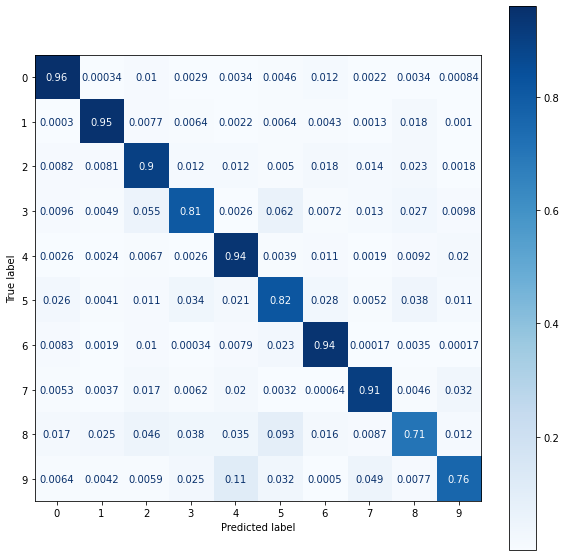

In [8]:
confusion_ma(y_train, y_train_pred, None)

In [9]:
accuracy_score(y_train, y_train_pred)

0.8717166666666667

In [10]:
from sklearn.metrics import classification_report

print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94      5923
           1       0.95      0.95      0.95      6742
           2       0.84      0.90      0.87      5958
           3       0.87      0.81      0.84      6131
           4       0.81      0.94      0.87      5842
           5       0.76      0.82      0.79      5421
           6       0.91      0.94      0.93      5918
           7       0.91      0.91      0.91      6265
           8       0.84      0.71      0.77      5851
           9       0.89      0.76      0.82      5949

    accuracy                           0.87     60000
   macro avg       0.87      0.87      0.87     60000
weighted avg       0.87      0.87      0.87     60000



In the above, support is the number of actual occurrences of the class in the specified dataset. 

Let's see the `Decision_function`

In [11]:
ind = 0
sample = X_train[0,:].reshape(1,-1)

model.predict(sample)

array([5])

In [12]:
y_train[ind]

5

In [13]:
model.decision_function(sample)

array([[-243170.46113694, -417699.05287982, -319739.37003832,
        -185045.47411735, -687975.6187432 ,  148441.70567531,
        -548285.05857699, -519588.65345332, -644205.86448037,
        -558108.94726516]])

In [14]:
sample_scores = model.decision_function(sample)
print(model.classes_[np.argmax(sample_scores)])

5
